In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Disaster Data Exploration

In [5]:
df = pd.read_excel(os.getcwd()+'/disasters.xlsx')
df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
2,1901-0003-BEL,1901,3,NaN,Technological,Technological,Industrial accident,Explosion,NaN,Coal mine,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
3,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,781207.0,3.200175,NaN,NaN,NaN,NaN
4,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [13]:
frequency = pd.DataFrame(df.groupby('Country').count()['Year'])
frequency = frequency.rename({'Year':'count'},axis=1)

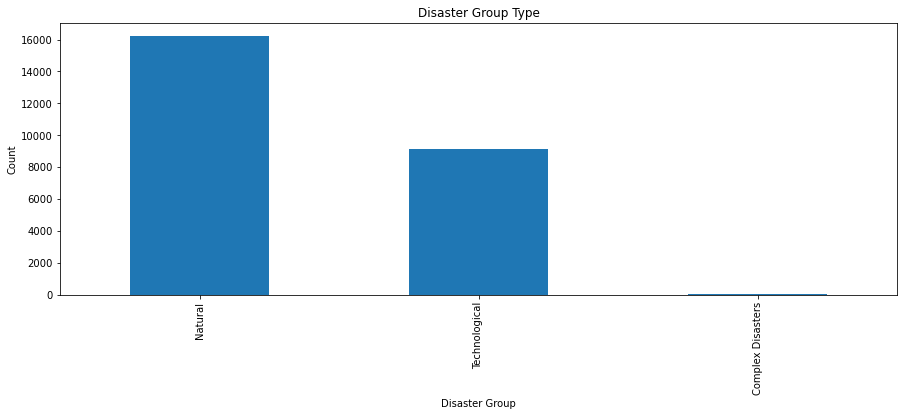

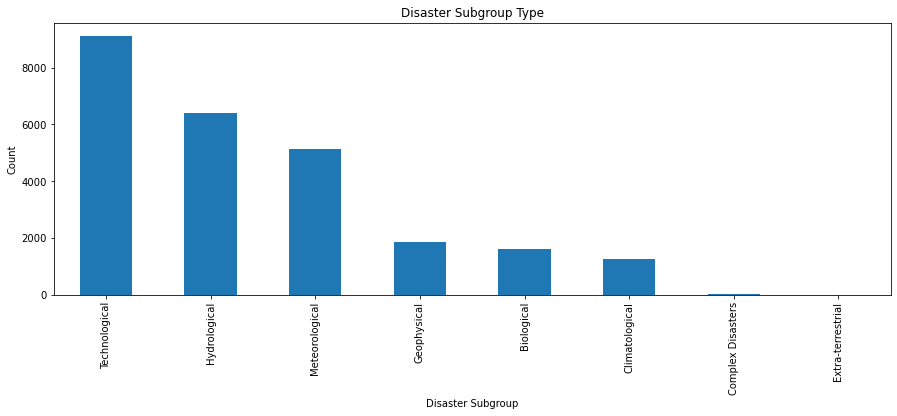

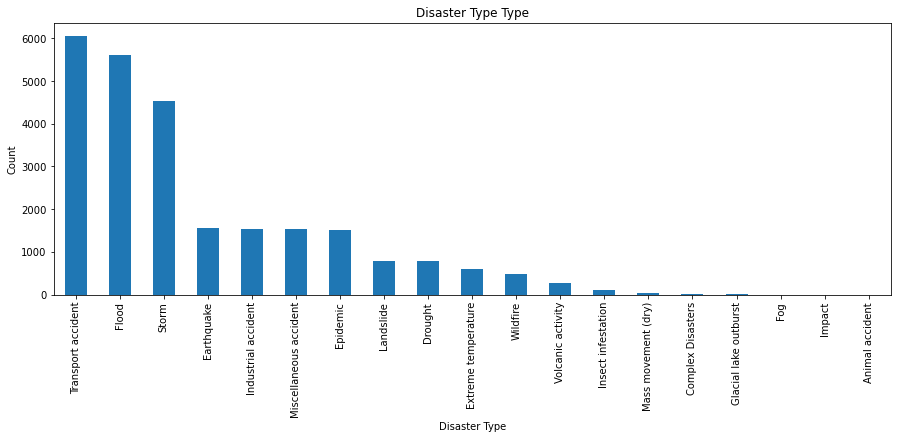

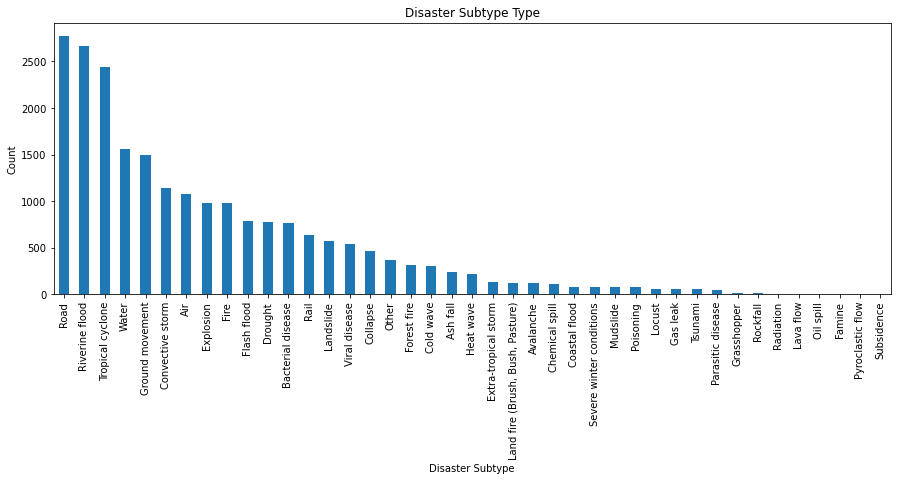

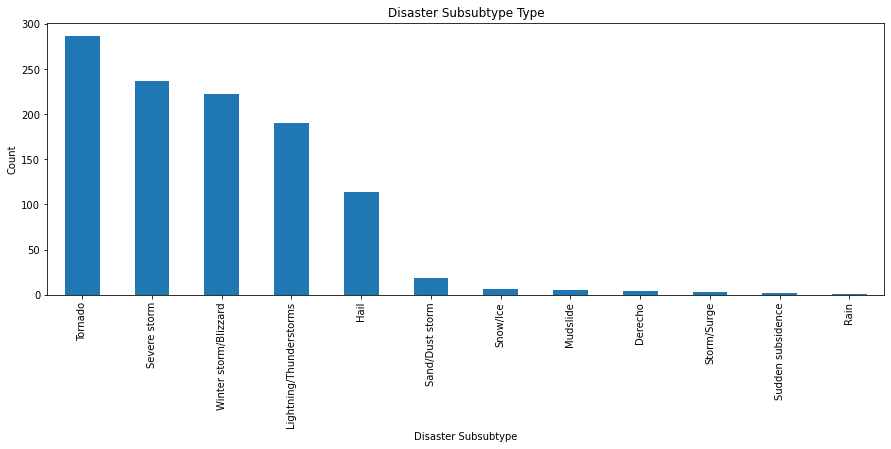

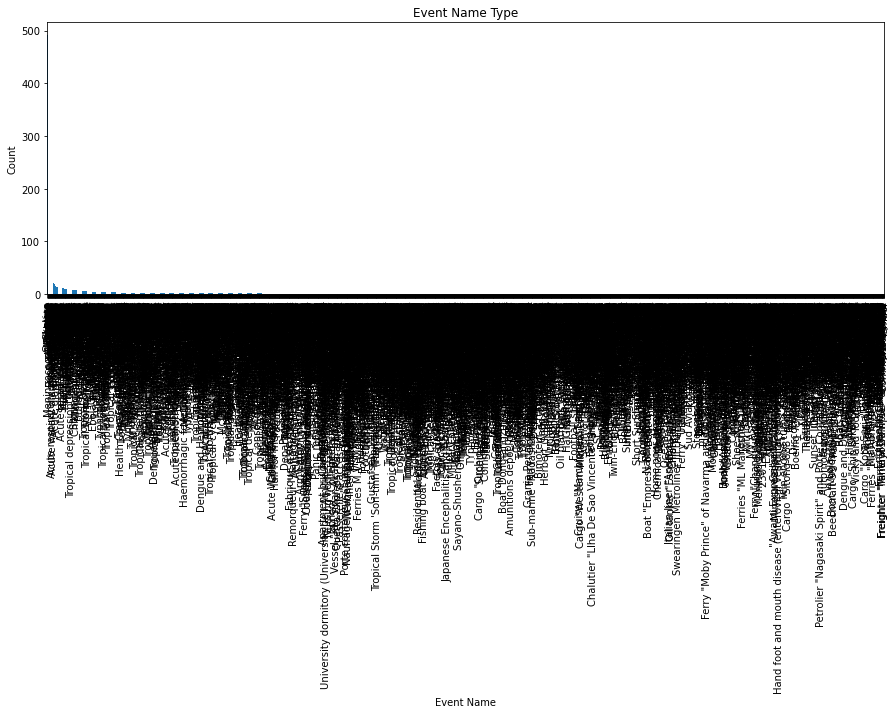

In [47]:
#Plotting categorical data
categorical_columns = ['Disaster Group', 'Disaster Subgroup','Disaster Type','Disaster Subtype', 'Disaster Subsubtype', 'Event Name']
def barplot(column_name):
    plt.figure(figsize=(15,5))
    df2 = df.dropna(subset=[column_name])
    df2[column_name].value_counts().plot(kind='bar',)
    plt.ylabel('Count')
    plt.xlabel(df2[column_name].name);
    plt.title(f'{df2[column_name].name} Type')
for col in categorical_columns:
    barplot(col)
   

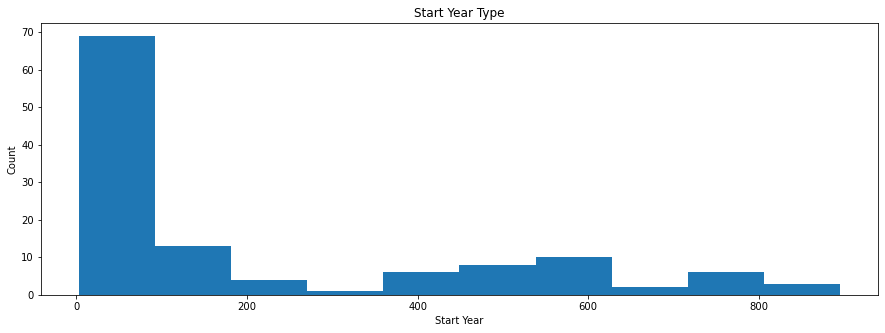

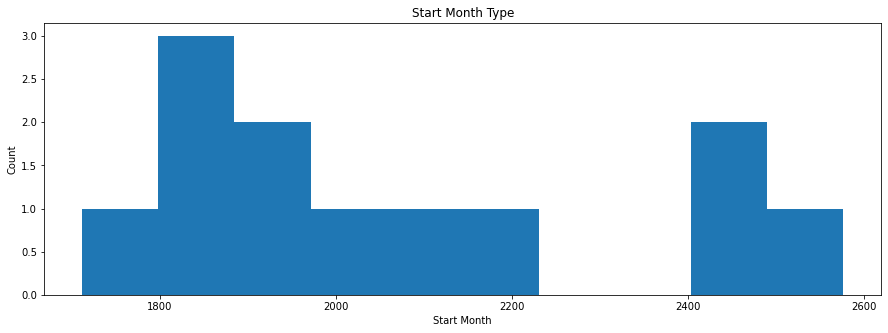

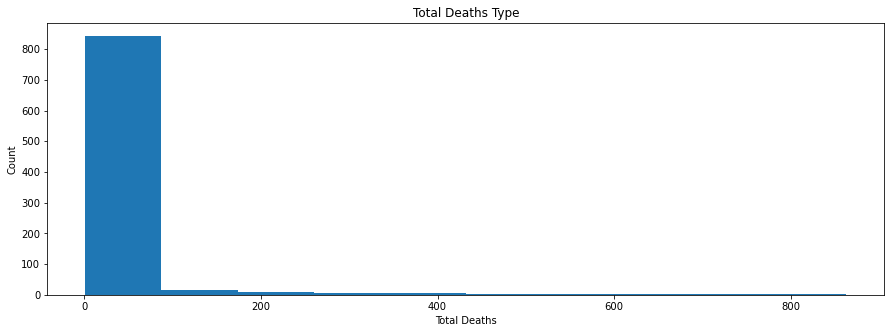

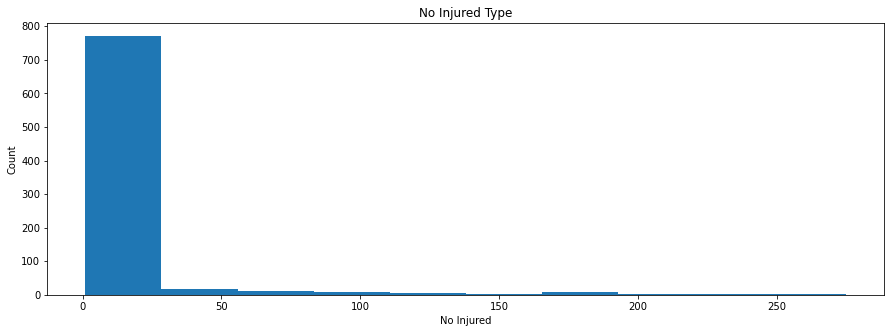

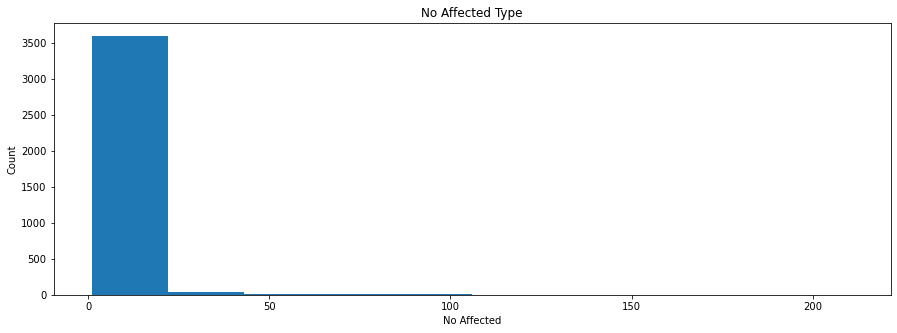

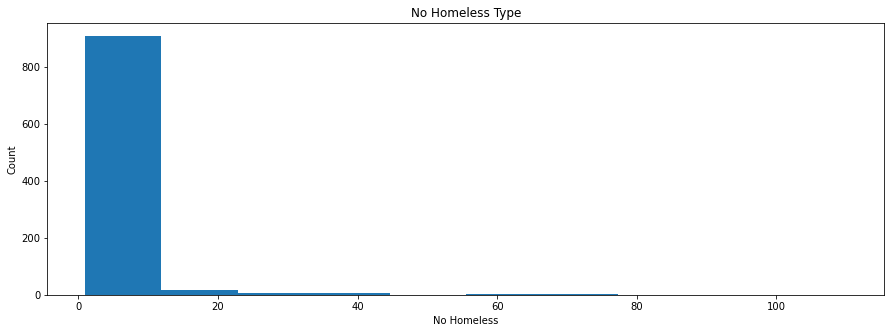

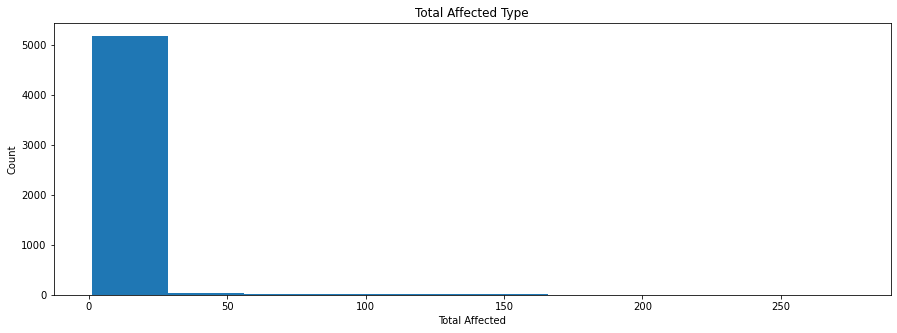

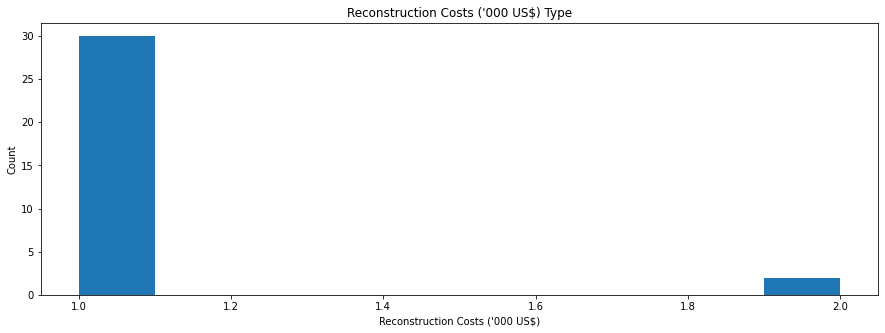

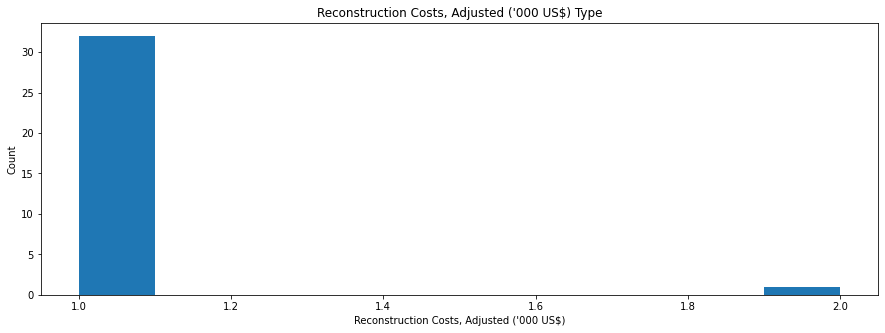

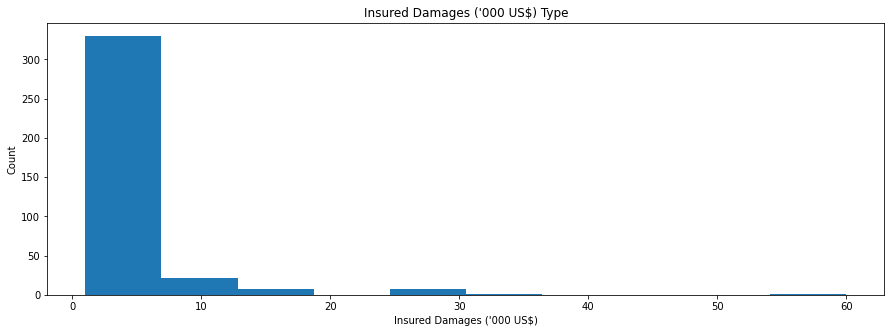

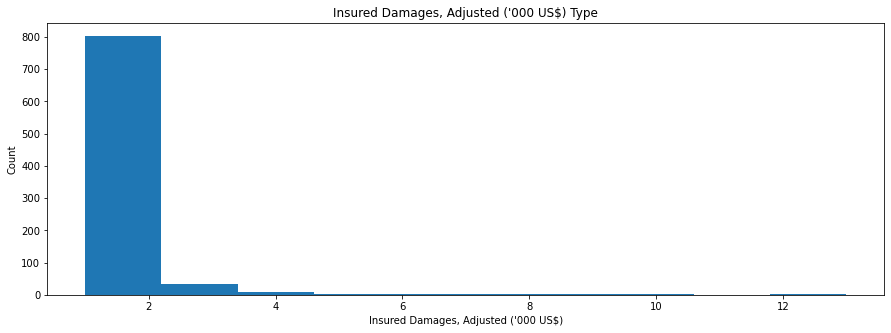

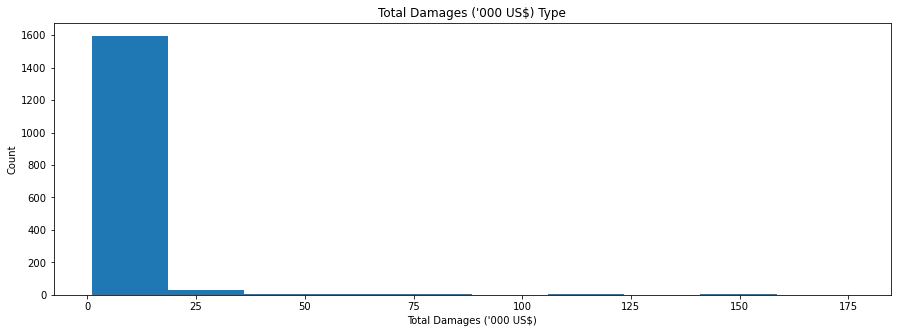

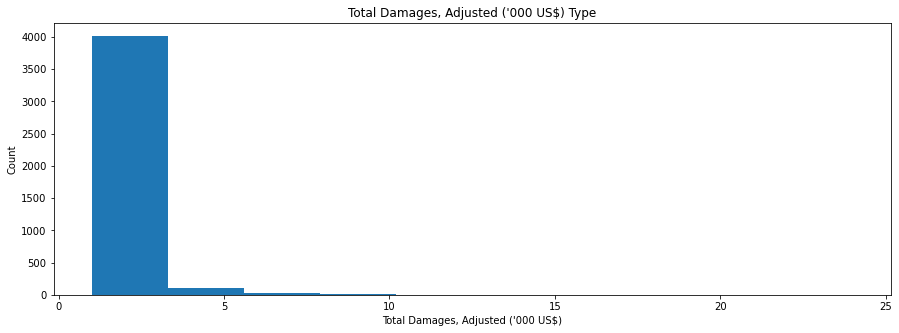

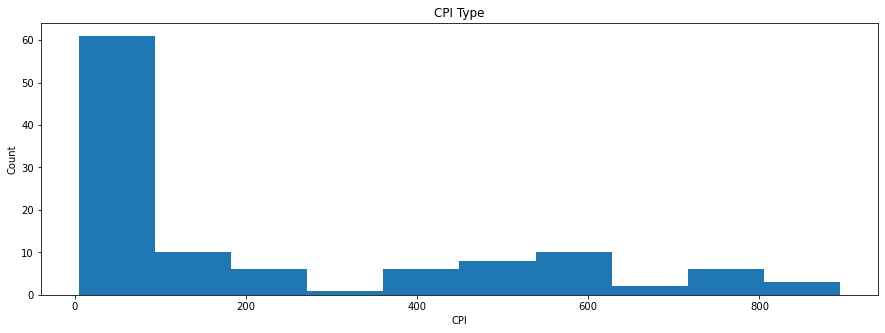

In [50]:
#Plotting numerical columns
numerical_columns = ['Start Year', 'Start Month','Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', "Reconstruction Costs ('000 US$)",
       "Reconstruction Costs, Adjusted ('000 US$)",
       "Insured Damages ('000 US$)", "Insured Damages, Adjusted ('000 US$)",
       "Total Damages ('000 US$)", "Total Damages, Adjusted ('000 US$)", 'CPI']
def histplot(column_name):
    plt.figure(figsize=(15,5))
    df2 = df.dropna(subset=[column_name])
    df2[column_name].value_counts().plot(kind='hist',)
    plt.ylabel('Count')
    plt.xlabel(df2[column_name].name);
    plt.title(f'{df2[column_name].name} Type')
for col in numerical_columns:
    histplot(col)

In [66]:
print(f"Percent null of deaths: {round(df.isna().sum()['Total Deaths']/df.shape[0]*100,2)}")

Percent null of deaths: 20.97


In [84]:
#Trying to find if there's a pattern to the missing values
null_deaths = df[df['Total Deaths'].isna()]
null_deaths.groupby("Country").count()['Dis No'].sort_values(ascending=False)[:50]

Country
United States of America (the)                                394
China                                                         227
Philippines (the)                                             188
Indonesia                                                     144
Australia                                                     135
Russian Federation (the)                                       97
Canada                                                         92
India                                                          84
Hong Kong                                                      82
France                                                         70
Mexico                                                         68
Japan                                                          67
Brazil                                                         60
New Zealand                                                    59
Colombia                                                       53
Th